# Linear Algebra for Machine Learning and Data Science Week 1  

## Solving Linear Systems: 2 variables

* Use NumPy linear algebra package to find the solutions of the system of linear equations
* Find the solution for the system of linear equations using elimination method
* Evaluate the determinant of the matrix and examine the relationship between matrix singularity and number of solutions of the linear system

### Solving Systems of Linear Equations using Matrices

Linear systems with two equations are easy to solve manually, but preparing for more complicated cases, you will investigate some solution techniques.

NumPy linear algebra package provides quick and reliable way to solve the system of linear equations using function `np.linalg.solve(A, b)`.

In [1]:
import numpy as np

In [23]:
A=np.array([[1,1],[1,2]],dtype=np.dtype(float))
b=np.array([10,12],dtype=np.dtype(float))

In [24]:
print("Mattrix A: ",A)
print("\nArray b: ",b)

Mattrix A:  [[1. 1.]
 [1. 2.]]

Array b:  [10. 12.]


In [25]:
# Check dimension of A and b using Shape Function
print(f"Shape of A: {A.shape}")
print(f"Shape of b: {b.shape}")

Shape of A: (2, 2)
Shape of b: (2,)


Now simply use `np.linalg.solve(A, b)` function to find the solution of the system
* The result will be saved in the 1-D array
* The elements will correspond to the values of two varibale `x1` and `x2`

In [26]:
X=np.linalg.solve(A,b)
print("Solution of the system: ",X)

Solution of the system:  [8. 2.]


This is `Non-singular` system , thta we two pieces of information mean two solution

### 1.3 - Evaluating Determinant of a Matrix
Matrix `A` corresponding to the linear system is a square matrix - it has the same number of rows and columns. In case of a square matrix it is possible to calculate its determinant - a real number which characterizes some properties of the matrix. Linear system containing two (or more) equations with the same number of unknown variables will `have one solution if and only if matrix
 has non-zero determinant`.

Let's calculate the determinant using NumPy linear algebra package. You can do it with the np.linalg.det(A) function. More information about it can be found in documentation.

In [27]:
# if det have no zero value that mean system have unique solution
# if det equals to zero in this case we have two possiblity  infinitie solution or Non solution
d=np.linalg.det(A)
print("Determinant of A: ",d)

Determinant of A:  1.0


## Solving System of Linear Equations using Elimination Method

You can see how easy it is to use contemporary packages to solve linear equations. However, for deeper understanding of mathematical concepts, it is important to practice some solution techniques manually. Programming approach can still help here to reduce the amount of arithmetical calculations, and focus on the method itself.

### Preparation for the Implementation of Elimination Method in the Code
Representing the system in a matrix form as you can apply the same operations to the rows of the matrix with Python code. Unify matrix and array
into one matrix using `np.hstack()` function. Note that the shape of the originally defined array was to stack it with the matrix you need to use
 `.reshape((2, 1))` function:

In NumPy, the `np.hstack()` function is used to horizontally stack arrays. It combines multiple arrays along the second axis (columns), provided the arrays have the same shape along the first axis (rows).

* Key Characteristics:
  1. `Purpose`: Concatenates arrays along the horizontal axis.
  2. `Shape Requirement`: Arrays must have the same number of rows (or be broadcastable to the same shape).
  3. `Result`: A new array formed by placing the input arrays side-by-side.

In [28]:
A , b

(array([[1., 1.],
        [1., 2.]]),
 array([10., 12.]))

In [48]:
A_system = np.hstack((A, b.reshape((2, 1))))
print(A_system)

[[ 1.  1. 10.]
 [ 1.  2. 12.]]


### Implementation of Elimination Method

In [30]:
# Function .copy() is used to keep the original matrix without any changes.
A_system_copy = A_system.copy()

In [31]:
A_system_copy[1]=A_system_copy[1]-A_system_copy[0]
A_system_copy

array([[ 1.,  1., 10.],
       [ 0.,  1.,  2.]])

In [43]:
# Lets try system of three variables
A3=np.array([[1,1,2],[3,-3,-1],[2,-1,6]],dtype=np.dtype(float))
b3=np.array([12,13,24],dtype=np.dtype(float))

In [44]:
A3 , b3

(array([[ 1.,  1.,  2.],
        [ 3., -3., -1.],
        [ 2., -1.,  6.]]),
 array([12., 13., 24.]))

In [45]:
det=np.linalg.det(A3)
det

-33.0

In [46]:
solve=np.linalg.solve(A3,b3)
solve

array([6.42424242, 1.39393939, 2.09090909])

In [49]:
A3_system = np.hstack((A3, b3.reshape((3, 1))))
print(A3_system)

[[ 1.  1.  2. 12.]
 [ 3. -3. -1. 13.]
 [ 2. -1.  6. 24.]]


In [97]:
A3_system_copy = A3_system.copy()

In [98]:
A3_system_copy[2]=A3_system_copy[2]-2*A3_system_copy[0]
A3_system_copy

array([[ 1.,  1.,  2., 12.],
       [ 3., -3., -1., 13.],
       [ 0., -3.,  2.,  0.]])

In [99]:
A3_system_copy[1]=A3_system_copy[1]-3*A3_system_copy[0]
A3_system_copy

array([[  1.,   1.,   2.,  12.],
       [  0.,  -6.,  -7., -23.],
       [  0.,  -3.,   2.,   0.]])

In [100]:
A3_system_copy[2]=A3_system_copy[2] - A3_system_copy[1]/2
A3_system_copy

array([[  1. ,   1. ,   2. ,  12. ],
       [  0. ,  -6. ,  -7. , -23. ],
       [  0. ,   0. ,   5.5,  11.5]])

In [101]:
A3_system_copy[2]=A3_system_copy[2]/5.5
A3_system_copy

array([[  1.        ,   1.        ,   2.        ,  12.        ],
       [  0.        ,  -6.        ,  -7.        , -23.        ],
       [  0.        ,   0.        ,   1.        ,   2.09090909]])

In [102]:
A3_system_copy[1]=A3_system_copy[1]/6
A3_system_copy

array([[ 1.        ,  1.        ,  2.        , 12.        ],
       [ 0.        , -1.        , -1.16666667, -3.83333333],
       [ 0.        ,  0.        ,  1.        ,  2.09090909]])

In [105]:
A3_system_copy[1]=A3_system_copy[2]-A3_system_copy[1]
A3_system_copy


array([[ 1.        ,  1.        ,  2.        , 12.        ],
       [ 0.        ,  1.        ,  2.16666667,  5.92424242],
       [ 0.        ,  0.        ,  1.        ,  2.09090909]])

In [106]:
solve

array([6.42424242, 1.39393939, 2.09090909])

##  Graphical Representation of the Solution
A linear equation in two variables (here `x1` and `x2`)  is represented geometrically by a line which points (`x1` , `x2`)make up the collection of solutions of the equation. This is called the graph of the linear equation. In case of the system of two equations there will be two lines corresponding to each of the equations, and the solution will be the intersection point of those lines.

In the following code you will define a function `plot_lines()` to plot the lines and use it later to represent the solution which you found earlier. Do not worry if the code in the following cell will not be clear - at this stage this is not important code to understand.

In [107]:
import matplotlib.pyplot as plt

def plot_lines(M):
    x_1 = np.linspace(-10,10,100)
    x_2_line_1 = (M[0,2] - M[0,0] * x_1) / M[0,1]
    x_2_line_2 = (M[1,2] - M[1,0] * x_1) / M[1,1]

    _, ax = plt.subplots(figsize=(10, 10))
    ax.plot(x_1, x_2_line_1, '-', linewidth=2, color='#0075ff',
        label=f'$x_2={-M[0,0]/M[0,1]:.2f}x_1 + {M[0,2]/M[0,1]:.2f}$')
    ax.plot(x_1, x_2_line_2, '-', linewidth=2, color='#ff7300',
        label=f'$x_2={-M[1,0]/M[1,1]:.2f}x_1 + {M[1,2]/M[1,1]:.2f}$')

    A = M[:, 0:-1]
    b = M[:, -1::].flatten()
    d = np.linalg.det(A)

    if d != 0:
        solution = np.linalg.solve(A,b)
        ax.plot(solution[0], solution[1], '-o', mfc='none',
            markersize=10, markeredgecolor='#ff0000', markeredgewidth=2)
        ax.text(solution[0]-0.25, solution[1]+0.75, f'$(${solution[0]:.0f}$,{solution[1]:.0f})$', fontsize=14)
    ax.tick_params(axis='x', labelsize=14)
    ax.tick_params(axis='y', labelsize=14)
    ax.set_xticks(np.arange(-10, 10))
    ax.set_yticks(np.arange(-10, 10))

    plt.xlabel('$x_1$', size=14)
    plt.ylabel('$x_2$', size=14)
    plt.legend(loc='upper right', fontsize=14)
    plt.axis([-10, 10, -10, 10])

    plt.grid()
    plt.gca().set_aspect("equal")

    plt.show()

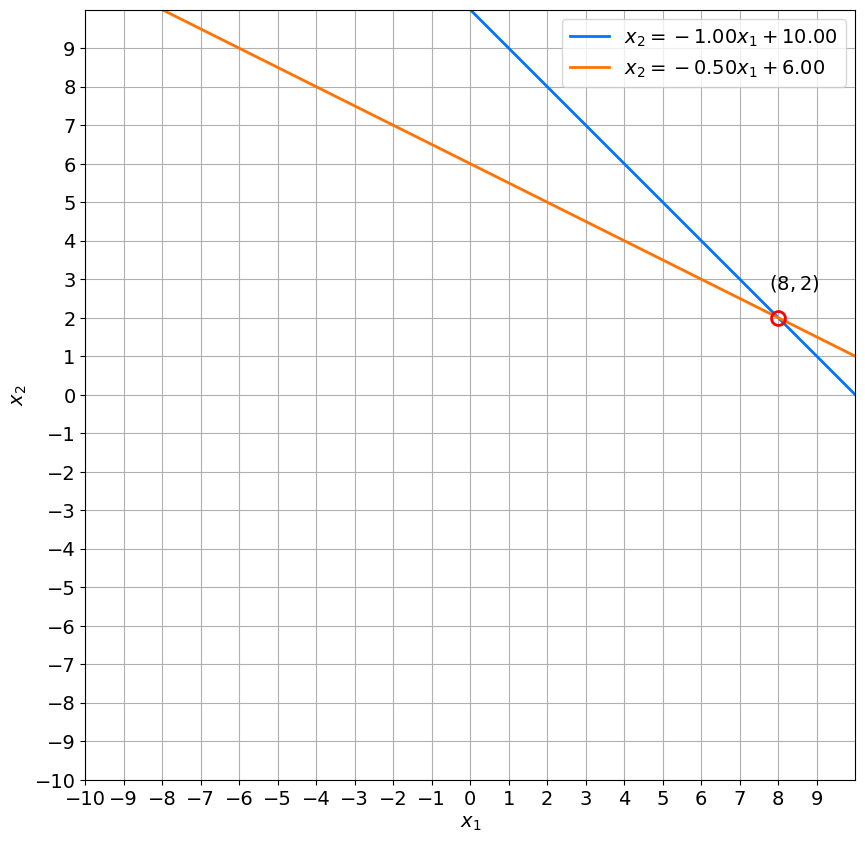

In [110]:
plot_lines(A_system)

## System of Linear Equations with No Solutions

In [111]:
A_2 = np.array([
        [-1, 3],
        [3, -9]
    ], dtype=np.dtype(float))

b_2 = np.array([7, 1], dtype=np.dtype(float))

d_2 = np.linalg.det(A_2)

print(f"Determinant of matrix A_2: {d_2:.2f}")

Determinant of matrix A_2: 0.00


It is equal to zero, thus the system cannot have one unique solution. It will have either infinitely many solutions or none. The consistency of it will depend on the free coefficients (right side coefficients). You can run the code in the following cell to check that the np.linalg.solve() function will give an error due to singularity.

In [112]:
try:
    x_2 = np.linalg.solve(A_2, b_2)
except np.linalg.LinAlgError as err:
    print(err)

Singular matrix


Prepare to apply the elimination method, constructing the matrix, corresponding to this linear system:

In [113]:
A_2_system = np.hstack((A_2, b_2.reshape((2, 1))))
print(A_2_system)

[[-1.  3.  7.]
 [ 3. -9.  1.]]


In [114]:
# copy() matrix.
A_2_system_res = A_2_system.copy()

# Multiply row 0 by 3 and add it to the row 1.
A_2_system_res[1] = 3 * A_2_system_res[0] + A_2_system_res[1]
print(A_2_system_res)

[[-1.  3.  7.]
 [ 0.  0. 22.]]


The last row will correspond to the equation `0=22` which has no solution. Thus the whole linear system has no solutions. Let's see what will be on the graph. Do you expect the corresponding two lines to intersect?

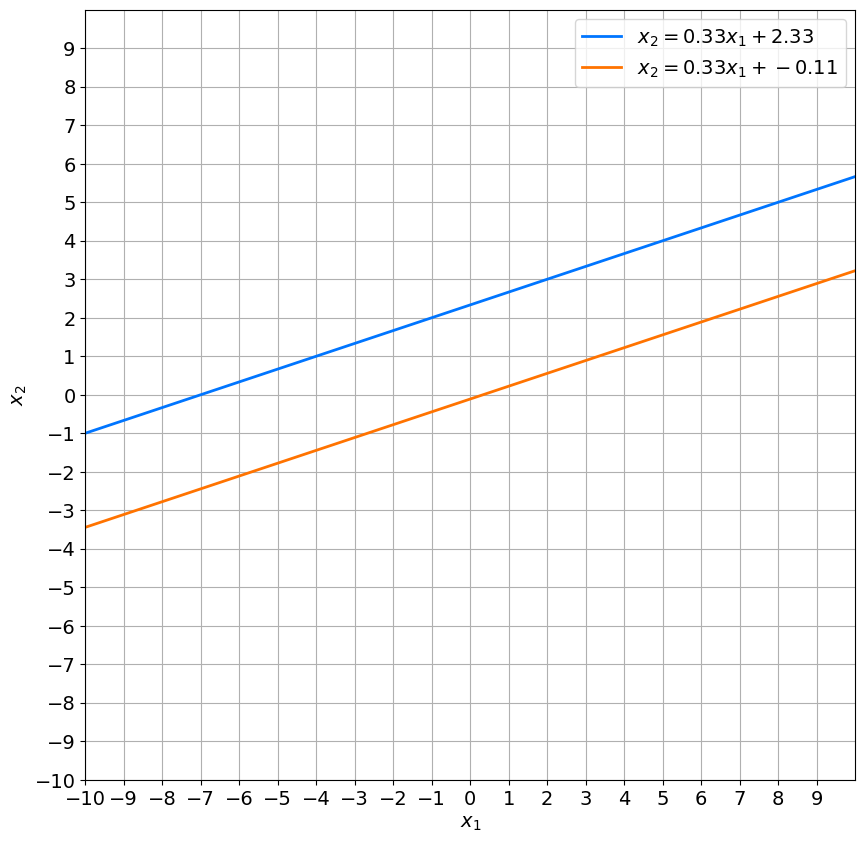

In [115]:
plot_lines(A_2_system)

## System of Linear Equations with Infinite Number of Solutions

In [116]:

b_3 = np.array([7, -21], dtype=np.dtype(float))

In [117]:
A_3_system = np.hstack((A_2, b_3.reshape((2, 1))))
print(A_3_system)

[[ -1.   3.   7.]
 [  3.  -9. -21.]]


In [118]:
# copy() matrix.
A_3_system_res = A_3_system.copy()

# Multiply row 0 by 3 and add it to the row 1.
A_3_system_res[1] = 3 * A_3_system_res[0] + A_3_system_res[1]
print(A_3_system_res)

[[-1.  3.  7.]
 [ 0.  0.  0.]]


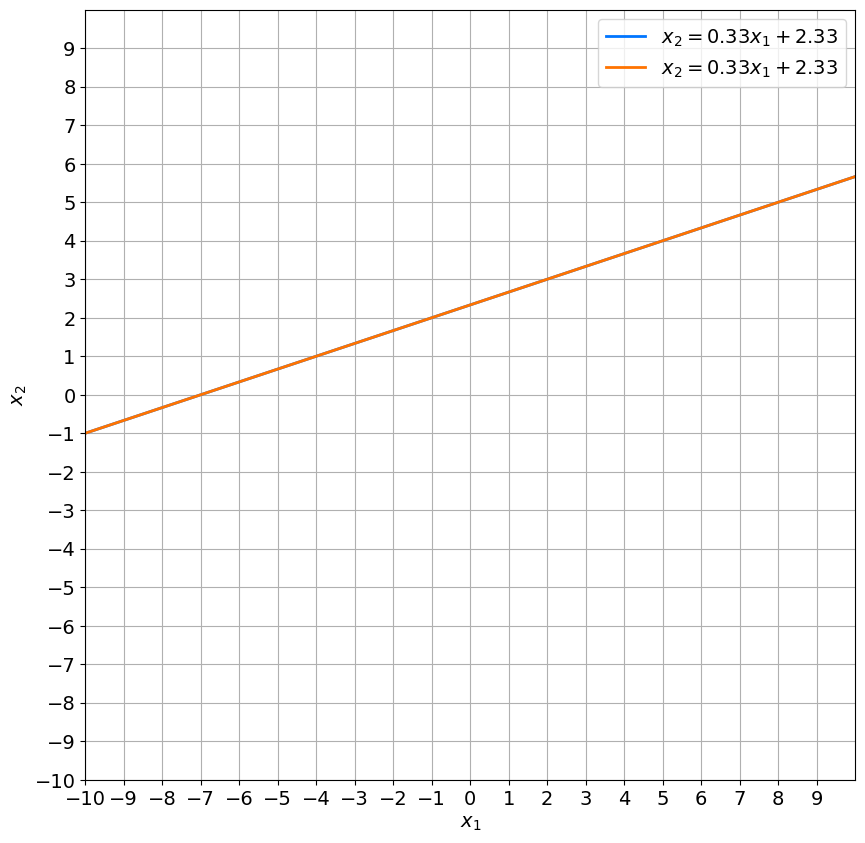

In [119]:
plot_lines(A_3_system)